## EXPLORATION OF CAREER CHOICE BY GENDER FROM 2019 TO 2022

The data set was extracted from the data catalogue from the Spanish government https://www.universidades.gob.es/ with the aim of replicating studies on career choice and gender, such as 


In [1391]:
#import libraries
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [1365]:
#import data set
df = pd.read_csv('carreerchoice.csv')
df.head()

,age,gender,quantity,period,career
0,18-21,female,200613,2019-2020,Ciencias sociales y juridicas
1,22-25,female,89492,2019-2020,Ciencias sociales y juridicas
2,26-30,female,32672,2019-2020,Ciencias sociales y juridicas
3,30,female,52202,2019-2020,Ciencias sociales y juridicas
4,18-21,female,205651,2020-2021,Ciencias sociales y juridicas


In [1366]:
df.groupby(['gender']).sum()

,quantity
gender,
female,1897370
male,1567087


Text(0.5, 1.0, 'Female and male enrolled in a Spanish university from 2019-2021')

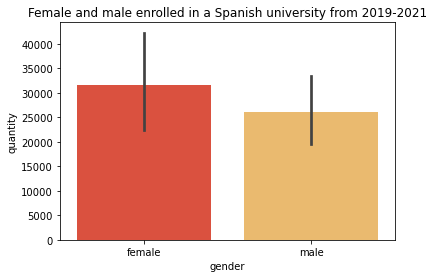

In [1367]:
sns.barplot(data= df, y ='quantity', x='gender', palette="YlOrRd_r")
plt.title('Female and male enrolled in a Spanish university from 2019-2021')

In [1368]:
fem = df[(df['gender']=='female')] 
indexes = fem.loc[(fem['quantity']>100000)].index
for i in indexes:
    df['quantity'][i] = 98563

C:\Users\vaorc\AppData\Local\Temp/ipykernel_16284/2526147996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity'][i] = 98563


In [1369]:
masc = df[(df['gender']=='male')] 
indexes = masc.loc[(masc['quantity']>100000)].index
for i in indexes:
    df['quantity'][i] = 98487

C:\Users\vaorc\AppData\Local\Temp/ipykernel_16284/991087347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity'][i] = 98487


In [1370]:
#masc['quantity'].min()
fem['quantity'].min()

2136

In [1371]:
careers = ['Artes y humanidades','Ciencias sociales y juridicas','Ingenieria y Arquitectura','Ciencias de la salud','Ciencias']

for car in careers:
    df_new = df[df['career']  == car]
    if (car == "Artes y humanidades"): 
        arts_humanities = df_new 
    elif (car=='Ciencias sociales y juridicas'):
        social_sciences = df_new 
    if(car=='Ingenieria y Arquitectura'):
        eng_arch = df_new 
    if(car=='Ciencias de la salud'):
        health_sciences = df_new 
    if (car=='Ciencias'): 
        sciences = df_new

Text(0.5, 1.0, 'Men and women entering university from 2019 until 2021')

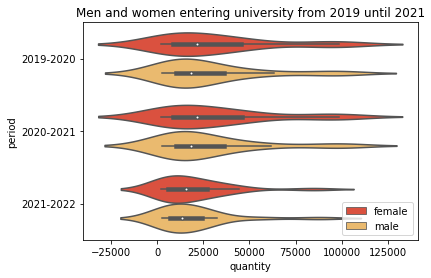

In [1372]:
#gender distribution across years
sns.violinplot(x = df['quantity'], hue= df['gender'], y = df['period'],palette="YlOrRd_r")
plt.legend(loc='lower right')
plt.title('Men and women entering university from 2019 until 2021')

In [1373]:
len(df['quantity'])

120

### Chosen career by gender and period in time

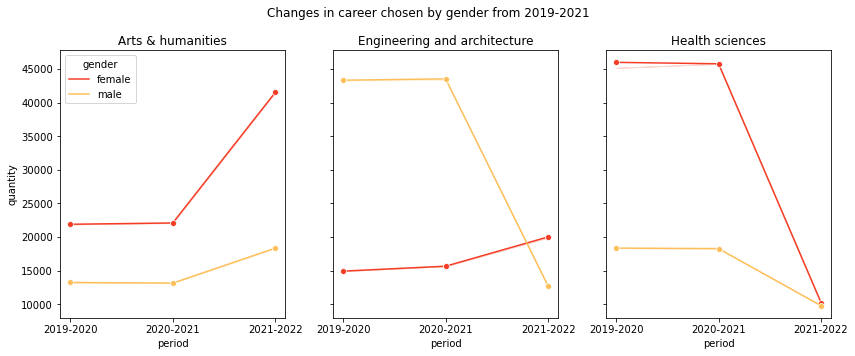

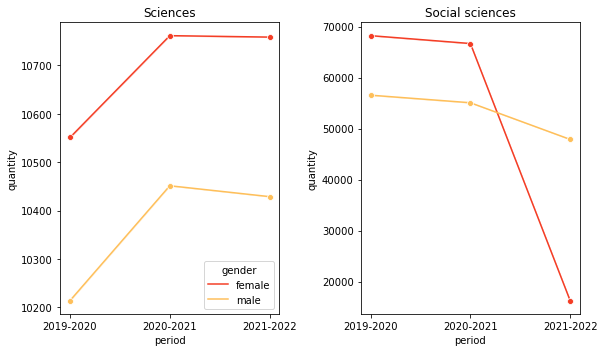

In [1374]:

figure, axes = plt.subplots(1,3, figsize=(12,5), sharey= True)
figure.suptitle('Changes in career chosen by gender from 2019-2021')
sns.lineplot(data= arts_humanities, x= 'period', y = 'quantity', hue = 'gender', ci= False, ax = axes[0], marker= 'o', palette = "YlOrRd_r").set(title = 'Arts & humanities')
sns.lineplot(data= eng_arch, x= 'period', y = 'quantity', hue = 'gender', ci= False, ax = axes[1],legend= False,marker= 'o', palette = "YlOrRd_r").set(title = 'Engineering and architecture')
sns.lineplot(data= health_sciences, x= 'period', y = 'quantity', hue = 'gender', ci= False, ax = axes[2],legend= False,marker= 'o', palette = "YlOrRd_r").set(title = 'Health sciences')

plt.tight_layout()

figure, axes = plt.subplots(1,2, figsize=(8.5,5), sharey= False)
sns.lineplot(data= sciences, x= 'period', y = 'quantity', hue = 'gender',marker= 'o', ci= False, ax=axes[0], palette = "YlOrRd_r").set(title = 'Sciences')
sns.lineplot(data = social_sciences, x= 'period', y = 'quantity', hue = 'gender', ci= False, ax = axes[1],legend= False, marker= 'o', palette = "YlOrRd_r").set(title = 'Social sciences' )
plt.tight_layout()


### Age distribution per career

In [1375]:
"""plt.figure(figsize=(10,8))
career_list = ['arts_humanities', 'social_sciences', 'eng_arch', 'health_sciences']
for i, val in enumerate(career_list):
   print(val)
   ax =plt.subplot(2,3,i+1)
   sns.lineplot(data = val, y = 'quantity', x= 'age', hue = 'gender', palette= 'Set2')# ax= ax)"""

"plt.figure(figsize=(10,8))\ncareer_list = ['arts_humanities', 'social_sciences', 'eng_arch', 'health_sciences']\nfor i, val in enumerate(career_list):\n   print(val)\n   ax =plt.subplot(2,3,i+1)\n   sns.lineplot(data = val, y = 'quantity', x= 'age', hue = 'gender', palette= 'Set2')# ax= ax)"

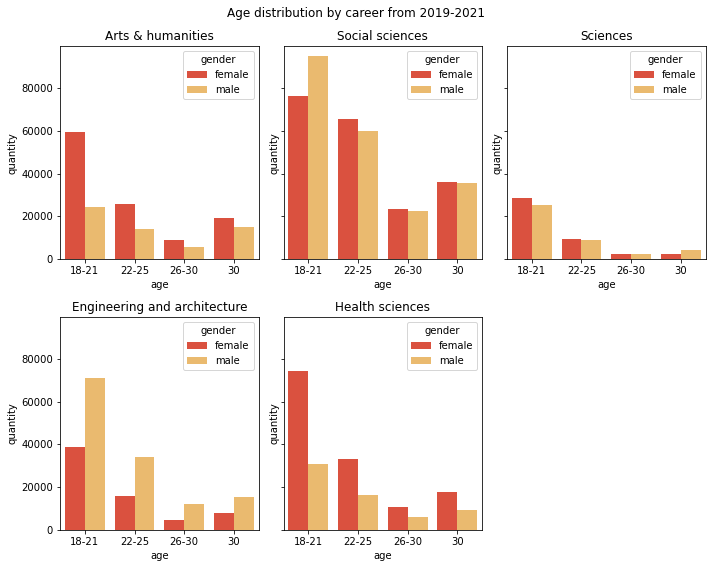

In [1376]:

figure, axes = plt.subplots(2,3, figsize=(10,8), sharey= True)
figure.suptitle('Age distribution by career from 2019-2021')
sns.barplot(data= arts_humanities, x= 'age', y = 'quantity', hue = 'gender', ci= False, ax = axes[0,0], palette = "YlOrRd_r").set(title = 'Arts & humanities')
sns.barplot(data = social_sciences, x= 'age', y = 'quantity', hue = 'gender', ci= False, ax = axes[0,1], palette = "YlOrRd_r").set(title = 'Social sciences' )
sns.barplot(data= eng_arch, x= 'age', y = 'quantity', hue = 'gender', ci= False, ax = axes[1,0], palette = "YlOrRd_r").set(title = 'Engineering and architecture')
sns.barplot(data= health_sciences, x= 'age', y = 'quantity', hue = 'gender', ci= False, ax = axes[1,1], palette = "YlOrRd_r").set(title = 'Health sciences')
sns.barplot(data= sciences, x= 'age', y = 'quantity', hue = 'gender', ci= False, ax = axes[0,2], palette = "YlOrRd_r").set(title = 'Sciences')
figure.delaxes(axes[1,2])
plt.tight_layout()


Text(0.5, 1.0, 'Men and women entering university from 2019 until 2021')

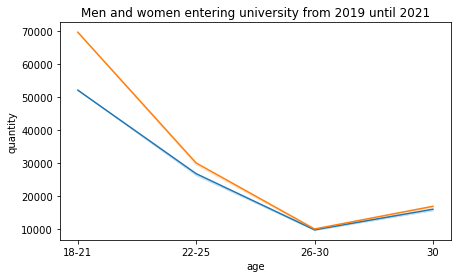

In [1377]:
#gender distribution across years
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=masc, y= 'quantity', x= 'age', ci =False, palette = "YlOrRd_r")
sns.lineplot(data=fem, y= 'quantity', x= 'age', ci= False, palette = "YlOrRd_r")


plt.title('Men and women entering university from 2019 until 2021')

[Text(0.5, 1.0, 'Age of enrrollment across periods')]

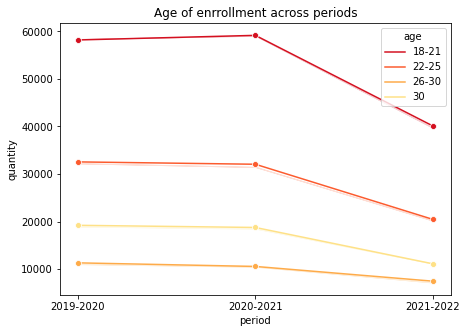

In [1378]:
#changes of age from 2019 to 2021
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data= df, x= df['period'], y = df['quantity'], hue = df['age'], ci= False, marker= 'o', palette = "YlOrRd_r").set(title = 'Age of enrrollment across periods')

In [1386]:
#Read new db
df = pd.read_csv('./anonymisedData/studentInfo.csv')
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [1380]:
df['num_of_prev_attempts'].value_counts()

0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64

gender


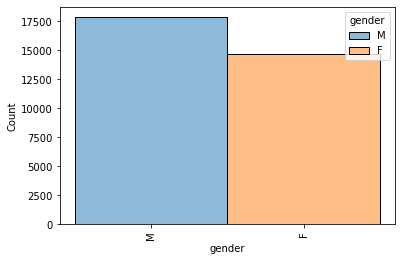

region


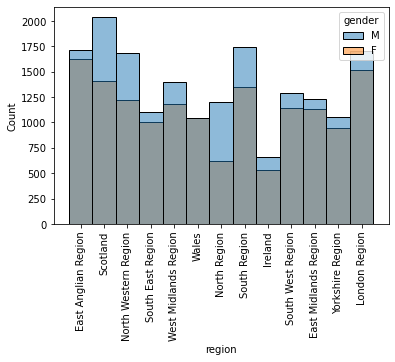

highest_education


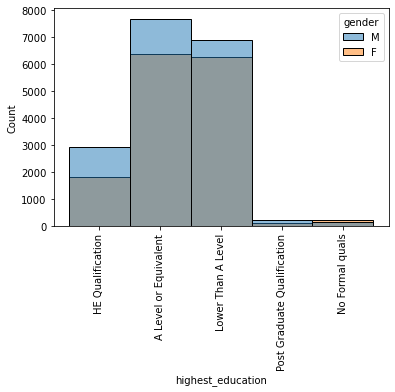

imd_band


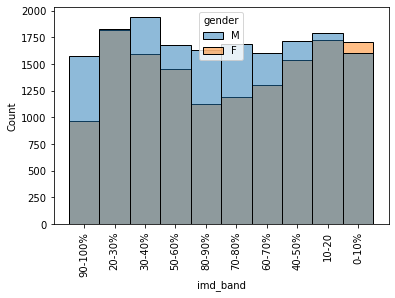

age_band


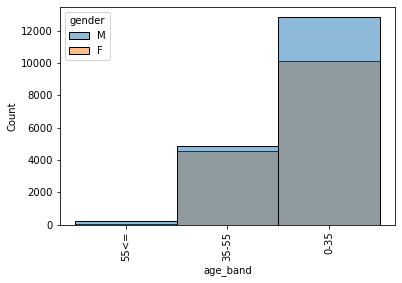

num_of_prev_attempts


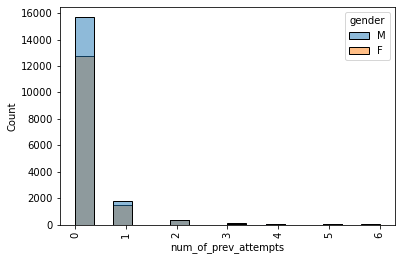

studied_credits


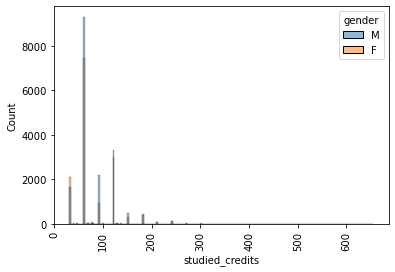

disability


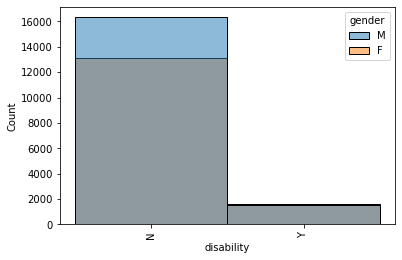

final_result


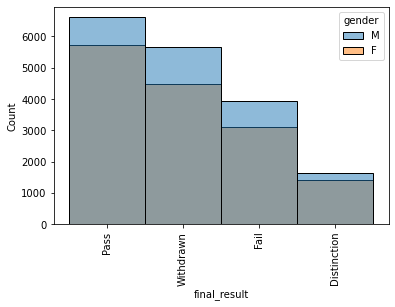

In [1381]:
for i, column in enumerate (df.columns):
        if i>2:
            print(column)
            sns.histplot(x = column, data = df, hue='gender')
            plt.xticks(rotation = 90)
            plt.show()


In [1382]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')

(0.0, 20.0)

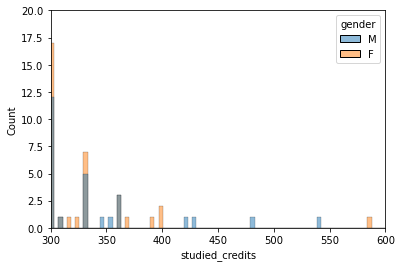

In [1383]:
sns.histplot(x = df["studied_credits"], hue = df['gender'])
plt.xlim(300,600)
plt.ylim(0,20)

In [1384]:
len(df)

32593

In [1387]:
sns.histplot(df["studied_credits"], hue = df['gender']) #>400 -300
plt.xticks(0,300)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [1388]:
#Drop id student
df.drop(columns=['id_student', 'code_presentation'], inplace= True)
df.describe()

,num_of_prev_attempts,studied_credits
count,32593.000000,32593.000000
mean,0.163225,79.758691
std,0.479758,41.071900
min,0.000000,30.000000
25%,0.000000,60.000000
50%,0.000000,60.000000
75%,0.000000,120.000000
max,6.000000,655.000000


Text(0.5, 1.0, 'AREA OF STUDY BY GENDER')

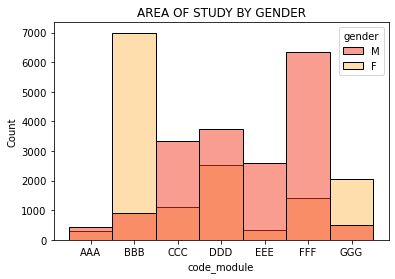

In [1390]:
#check variables and distributions
#Gender
sns.histplot(x = df['code_module'], hue = df['gender'], palette = "YlOrRd_r")
plt.title('AREA OF STUDY BY GENDER')

In [ ]:
df['imd_band'] = df['imd_band'].replace(to_replace=['10-20'],value=['10-20%'])

In [ ]:
indexes = df.loc[df['imd_band'].isnull()].index
values = ['0-10%','10-20','20-30%','30-40%','40-50%', '50-60%','60-70%','70-80%', '80-90%','90-100%']
for i, val in enumerate(indexes):
    if i>999 and i <1111:
        df['imd_band'].iloc[val]  = values[9]
    else:
        df['imd_band'].iloc[val]  = values[math.floor(i/111)]

c:\Users\vaorc\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


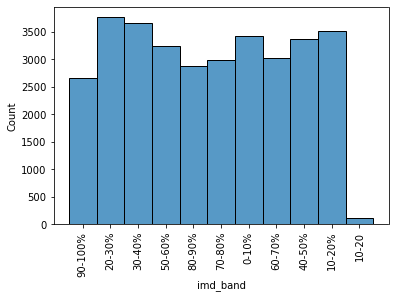

In [ ]:
sns.histplot(data = df, x= df['imd_band'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
columns = ['region', 'final_result', 'highest_education', 'imd_band', 'age_band','code_module']
dummies = pd.get_dummies(df[columns])
#add dummies to the new df
df = pd.concat((df,dummies), axis= 1)

In [ ]:
df.drop(columns=['region', 'final_result', 'highest_education','imd_band', 'age_band','code_module'], inplace=True)

In [ ]:
df['disability'] = df['disability'].replace(to_replace=['N','Y'],value=[0,1])

In [ ]:
df['gender'] = df['gender'].replace(to_replace=['F','M'],value=[0,1])

In [ ]:
df

,gender,num_of_prev_attempts,studied_credits,disability,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,...,age_band_0-35,age_band_35-55,age_band_55<=,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG
0,1,0,240,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,60,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,60,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,0,0,60,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,60,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,0,30,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32589,0,0,30,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32590,0,0,30,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32591,0,0,30,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
target = df['gender']
features = df.loc[:, df.columns != 'gender']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=12)


In [ ]:
#oversample women only in training data
#using random forest to predict the gender and check feature importance
sm = SMOTE(random_state=12)
x_train_over, y_train_over = sm.fit_sample(X_train, y_train)

<AxesSubplot:xlabel='gender', ylabel='Count'>

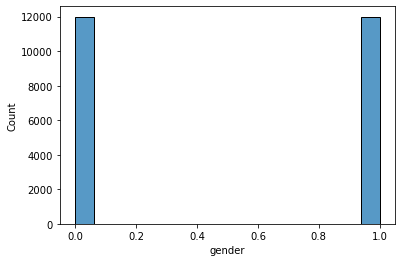

In [ ]:
sns.histplot(y_train_over)

In [ ]:
classifier =RandomForestClassifier(n_estimators=25, random_state=12)
classifier.fit(x_train_over,y_train_over)

RandomForestClassifier(n_estimators=25, random_state=12)

In [ ]:
predicted_class = classifier.predict(X_test)

In [ ]:
values_rf_cm = confusion_matrix(y_test, predicted_class)


([<matplotlib.axis.YTick at 0x1cf1e2c8160>,
 [Text(0, 0, '1'), Text(0, 1, '2')])

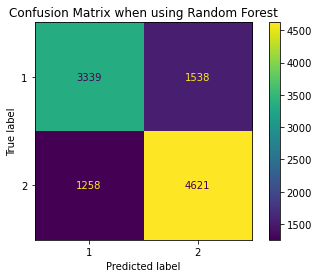

In [ ]:
display_rf_confusion_matrix = ConfusionMatrixDisplay(values_rf_cm)
display_rf_confusion_matrix.plot()
plt.title('Confusion Matrix when using Random Forest')
plt.xticks([0,1], [1,2])
plt.yticks([0,1], [1,2])

In [ ]:
start_time = time.time()
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


In [ ]:
feature_names = [f"feature {i}" for i in X_train]

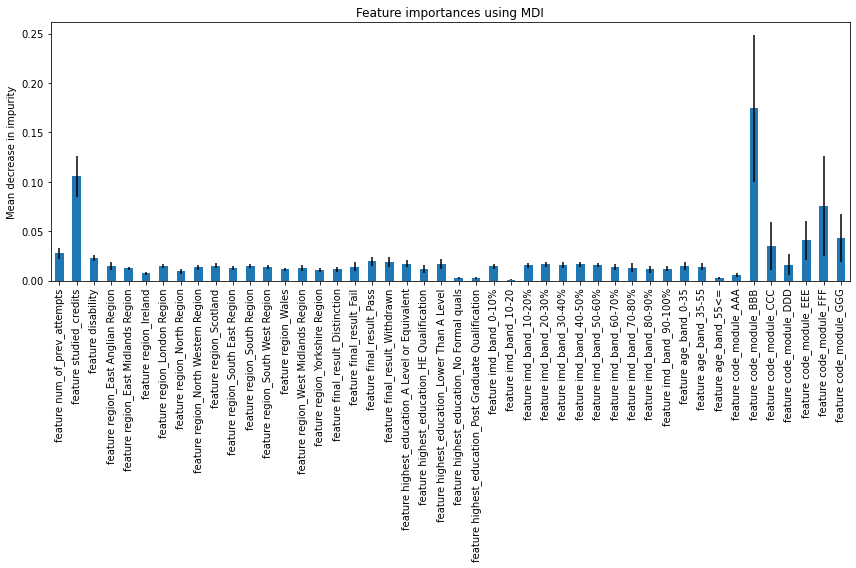

In [ ]:
forest_importances = pd.Series(importances, index= feature_names)

fig, ax = plt.subplots(figsize=(12,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
forest_importances[forest_importances>0.03]

feature studied_credits    0.105433
feature code_module_BBB    0.174371
feature code_module_CCC    0.034875
feature code_module_EEE    0.040650
feature code_module_FFF    0.075622
feature code_module_GGG    0.042680
dtype: float64

In [ ]:
# Balancing both training and test sets
sm = SMOTE(random_state=12)
x_test_over, y_test_over = sm.fit_sample(X_test, y_test)

In [ ]:
y_train_over.value_counts()

1    11996
0    11996
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

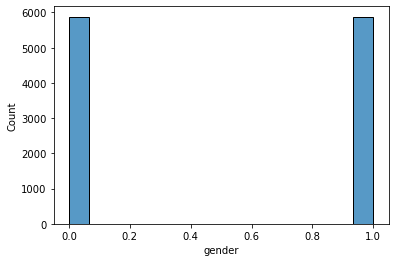

In [ ]:
sns.histplot(y_test_over)

In [ ]:
predicted_class = classifier.predict(x_test_over)
values_rf_cm = confusion_matrix(y_test_over, predicted_class)


"plt.xticks([0,1], ['F','M'])\nplt.yticks([0,1], ['F','M'])"

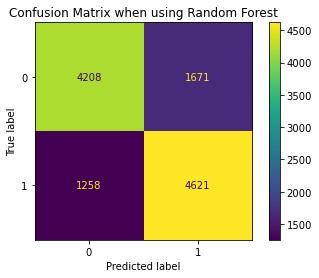

In [ ]:
display_rf_confusion_matrix = ConfusionMatrixDisplay(values_rf_cm)
display_rf_confusion_matrix.plot()
plt.title('Confusion Matrix when using Random Forest')
"""plt.xticks([0,1], ['F','M'])
plt.yticks([0,1], ['F','M'])"""

In [ ]:
y_test_over.value_counts()

0    5879
1    5879
Name: gender, dtype: int64

In [1392]:
print(classification_report(y_test_over, predicted_class))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5879
           1       0.73      0.79      0.76      5879

    accuracy                           0.75     11758
   macro avg       0.75      0.75      0.75     11758
weighted avg       0.75      0.75      0.75     11758

